In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\kuliah\\sem3\\data mining\\data.jabarprov.go.id\\umkm.csv")
df.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kategori_usaha,jumlah_umkm,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,AKSESORIS,927,UNIT,2017
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,BATIK,927,UNIT,2017
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,BORDIR,132,UNIT,2017
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,CRAFT,33111,UNIT,2017
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,FASHION,32316,UNIT,2017


In [3]:
df1 = pd.read_csv("D:\\kuliah\\sem3\\data mining\\data.jabarprov.go.id\\diskuk-od_17372_jml_ush_mikro_kecil_menengah_umkm__kabupatenkota_data.csv")
df1.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_umkm,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,375048,UNIT,2016
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,269002,UNIT,2016
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,250808,UNIT,2016
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,353277,UNIT,2016
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,259141,UNIT,2016


In [4]:
df3 = pd.merge(df, df1, how="right", on=["kode_kabupaten_kota","nama_kabupaten_kota","nama_provinsi","kode_provinsi","tahun"])
df3 = df3.drop(["id_y","satuan_x"], axis=1)
df3.head()

,id_x,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kategori_usaha,jumlah_umkm_x,tahun,jumlah_umkm_y,satuan_y
0,NaN,32,JAWA BARAT,3201,KABUPATEN BOGOR,NaN,NaN,2016,375048,UNIT
1,NaN,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,NaN,NaN,2016,269002,UNIT
2,NaN,32,JAWA BARAT,3203,KABUPATEN CIANJUR,NaN,NaN,2016,250808,UNIT
3,NaN,32,JAWA BARAT,3204,KABUPATEN BANDUNG,NaN,NaN,2016,353277,UNIT
4,NaN,32,JAWA BARAT,3205,KABUPATEN GARUT,NaN,NaN,2016,259141,UNIT


In [5]:
df13= df3.rename(columns=str.upper)
df3.columns = df3.columns.str.replace('id_x','id', regex=True)
df3.columns = df3.columns.str.replace('jumlah_umkm_x','jumlah_umkm_per_kategori', regex=True)
df3.columns = df3.columns.str.replace('jumlah_umkm_y','jumlah_umkm_keseluruhan', regex=True)
df3.columns = df3.columns.str.replace('satuan_y','satuan', regex=True)

In [6]:
df3.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kategori_usaha,jumlah_umkm_per_kategori,tahun,jumlah_umkm_keseluruhan,satuan
0,NaN,32,JAWA BARAT,3201,KABUPATEN BOGOR,NaN,NaN,2016,375048,UNIT
1,NaN,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,NaN,NaN,2016,269002,UNIT
2,NaN,32,JAWA BARAT,3203,KABUPATEN CIANJUR,NaN,NaN,2016,250808,UNIT
3,NaN,32,JAWA BARAT,3204,KABUPATEN BANDUNG,NaN,NaN,2016,353277,UNIT
4,NaN,32,JAWA BARAT,3205,KABUPATEN GARUT,NaN,NaN,2016,259141,UNIT


In [7]:
df3.isna().sum()

id                          27
kode_provinsi                0
nama_provinsi                0
kode_kabupaten_kota          0
nama_kabupaten_kota          0
kategori_usaha              27
jumlah_umkm_per_kategori    27
tahun                        0
jumlah_umkm_keseluruhan      0
satuan                       0
dtype: int64

In [ ]:
df3["id"].fillna("DATA_TIDAK_ADA", inplace = True)
df3["kategori_usaha"].fillna("DATA_TIDAK_ADA", inplace = True)
df3["jumlah_umkm_per_kategori"].fillna("DATA_TIDAK_ADA", inplace = True)

In [9]:
df3.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kategori_usaha,jumlah_umkm_per_kategori,tahun,jumlah_umkm_keseluruhan,satuan
0,DATA_TIDAK_ADA,32,JAWA BARAT,3201,KABUPATEN BOGOR,DATA_TIDAK_ADA,DATA_TIDAK_ADA,2016,375048,UNIT
1,DATA_TIDAK_ADA,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,DATA_TIDAK_ADA,DATA_TIDAK_ADA,2016,269002,UNIT
2,DATA_TIDAK_ADA,32,JAWA BARAT,3203,KABUPATEN CIANJUR,DATA_TIDAK_ADA,DATA_TIDAK_ADA,2016,250808,UNIT
3,DATA_TIDAK_ADA,32,JAWA BARAT,3204,KABUPATEN BANDUNG,DATA_TIDAK_ADA,DATA_TIDAK_ADA,2016,353277,UNIT
4,DATA_TIDAK_ADA,32,JAWA BARAT,3205,KABUPATEN GARUT,DATA_TIDAK_ADA,DATA_TIDAK_ADA,2016,259141,UNIT


<Axes: title={'center': 'jumlah_umkm_keseluruhan'}, xlabel='kode_kabupaten_kota'>

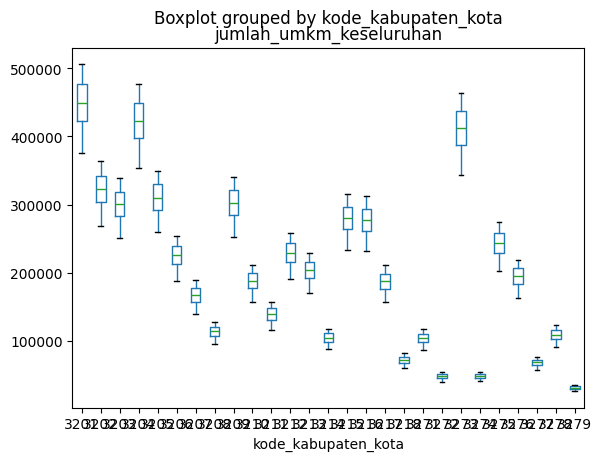

In [10]:
df3.boxplot(by ='kode_kabupaten_kota', column =['jumlah_umkm_keseluruhan'], grid = False)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

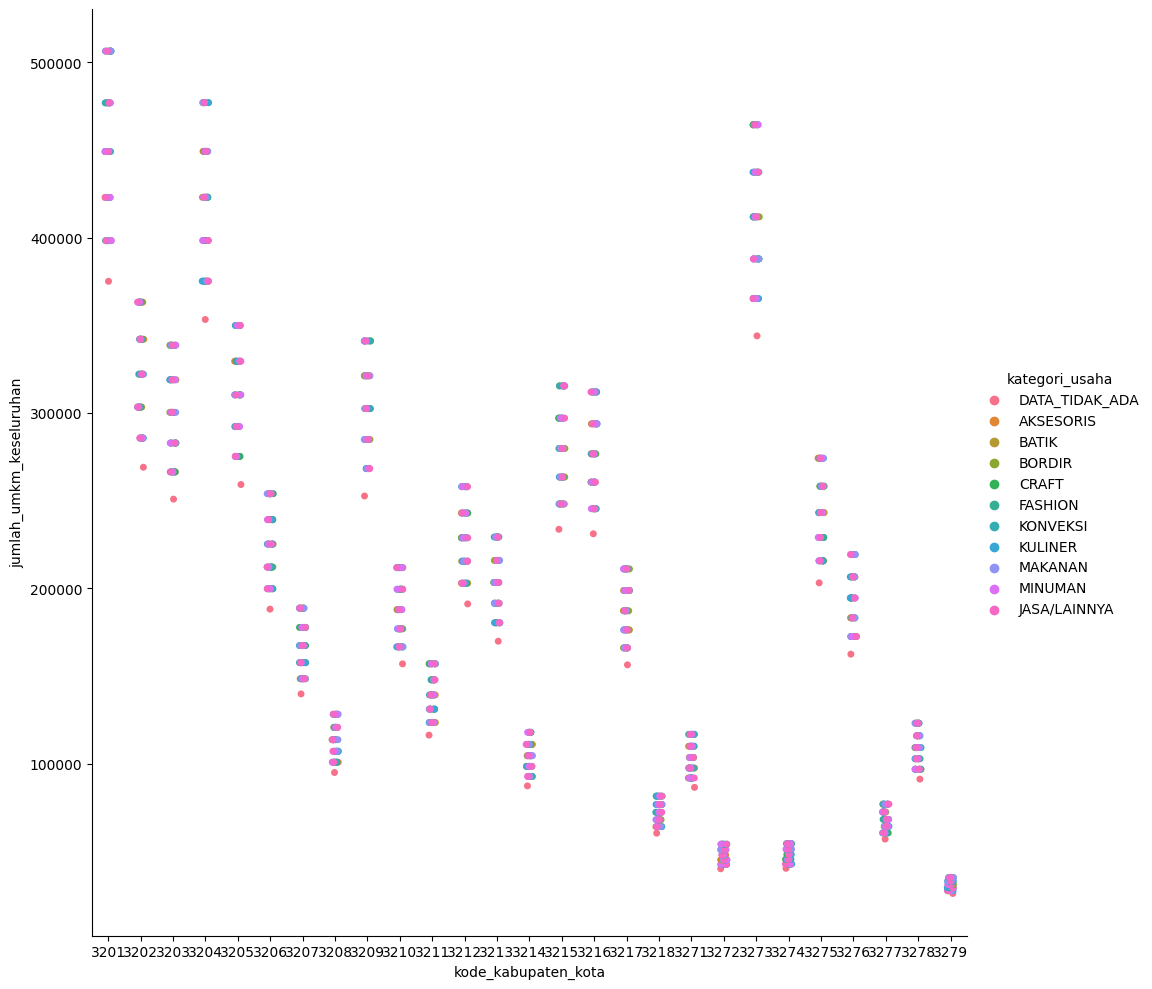

In [15]:
sns.catplot(x="kode_kabupaten_kota", y="jumlah_umkm_keseluruhan", hue="kategori_usaha", data=df3, height=10)